In [26]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import cm  # Import colormap
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from scipy import stats
import numpy as np; np.random.seed(sum(map(ord, 'calplot')))
import pandas as pd
import calplot
from urllib.request import urlopen
import json
import plotly.express as px
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, output_file, save
import pandas as pd
import folium
from folium import Marker
from folium.plugins import HeatMap
import plotly.express as px
import geopandas as gpd



# Contribution

Both members of the group has been participating equally. All tasks were solved and discussed in the group and both members are capable of solving the tasks seperately.

In [2]:

df_crime = pd.read_csv("Incident_Reports.csv") 

#Convert to datetime. OBS allready done so i don't have to run it again
df_crime['Year'] = pd.to_datetime(df_crime['Date']).dt.year

#Remove where year = 2018 (we don't have the whole year so we decide to remove it)
df_crime = df_crime[df_crime['Year'] != 2018]

df_crime.head()


#Count the number of crimes pr year
year_count = df_crime["Year"].value_counts()

In [3]:

df_drugs = df_crime[df_crime["Category"] == "DRUG/NARCOTIC"]
#Count the number of crimes in total
drugs_count = df_drugs["Year"].value_counts()


In [4]:
#make date as a datetime object
df_drugs['Date'] = pd.to_datetime(df_crime['Date'])

C:\Users\Orianne\AppData\Local\Temp\ipykernel_33804\1824424506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drugs['Date'] = pd.to_datetime(df_crime['Date'])


In [5]:
#Make a colunm that counts the month 
#MOnth of the year
df_drugs['MonthofYear'] = df_drugs['Date'].dt.year*15 + df_drugs['Date'].dt.month



C:\Users\Orianne\AppData\Local\Temp\ipykernel_33804\1311487564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drugs['MonthofYear'] = df_drugs['Date'].dt.year*15 + df_drugs['Date'].dt.month


In [6]:
#Count the districts with the most crime counts
df_drugs["PdDistrict"].value_counts()

TENDERLOIN    37365
SOUTHERN      20356
MISSION       18787
NORTHERN      10390
BAYVIEW        9569
PARK           5685
INGLESIDE      4963
CENTRAL        3924
TARAVAL        3189
RICHMOND       2124
Name: PdDistrict, dtype: int64

In [7]:
#make a barplot for the 3 districts tenderloin, southern and mission seperately
df_drugs_tenderloin = df_drugs[df_drugs["PdDistrict"] == "TENDERLOIN"]
df_drugs_southern = df_drugs[df_drugs["PdDistrict"] == "SOUTHERN"]
df_drugs_mission = df_drugs[df_drugs["PdDistrict"] == "MISSION"]


tenderloin_year_counts = df_drugs_tenderloin["Year"].value_counts()
southern_year_counts = df_drugs_southern["Year"].value_counts()
mission_year_counts = df_drugs_mission["Year"].value_counts()

year_district_count = df_drugs_tenderloin["Year"].value_counts()


color of district [0.267004 0.004874 0.329415 1.      ] BAYVIEW
color of district [0.281412 0.155834 0.469201 1.      ] CENTRAL
color of district [0.244972 0.287675 0.53726  1.      ] INGLESIDE
color of district [0.190631 0.407061 0.556089 1.      ] MISSION
color of district [0.147607 0.511733 0.557049 1.      ] NORTHERN
color of district [0.119699 0.61849  0.536347 1.      ] PARK
color of district [0.20803  0.718701 0.472873 1.      ] RICHMOND
color of district [0.430983 0.808473 0.346476 1.      ] SOUTHERN
color of district [0.709898 0.868751 0.169257 1.      ] TARAVAL
color of district [0.993248 0.906157 0.143936 1.      ] TENDERLOIN


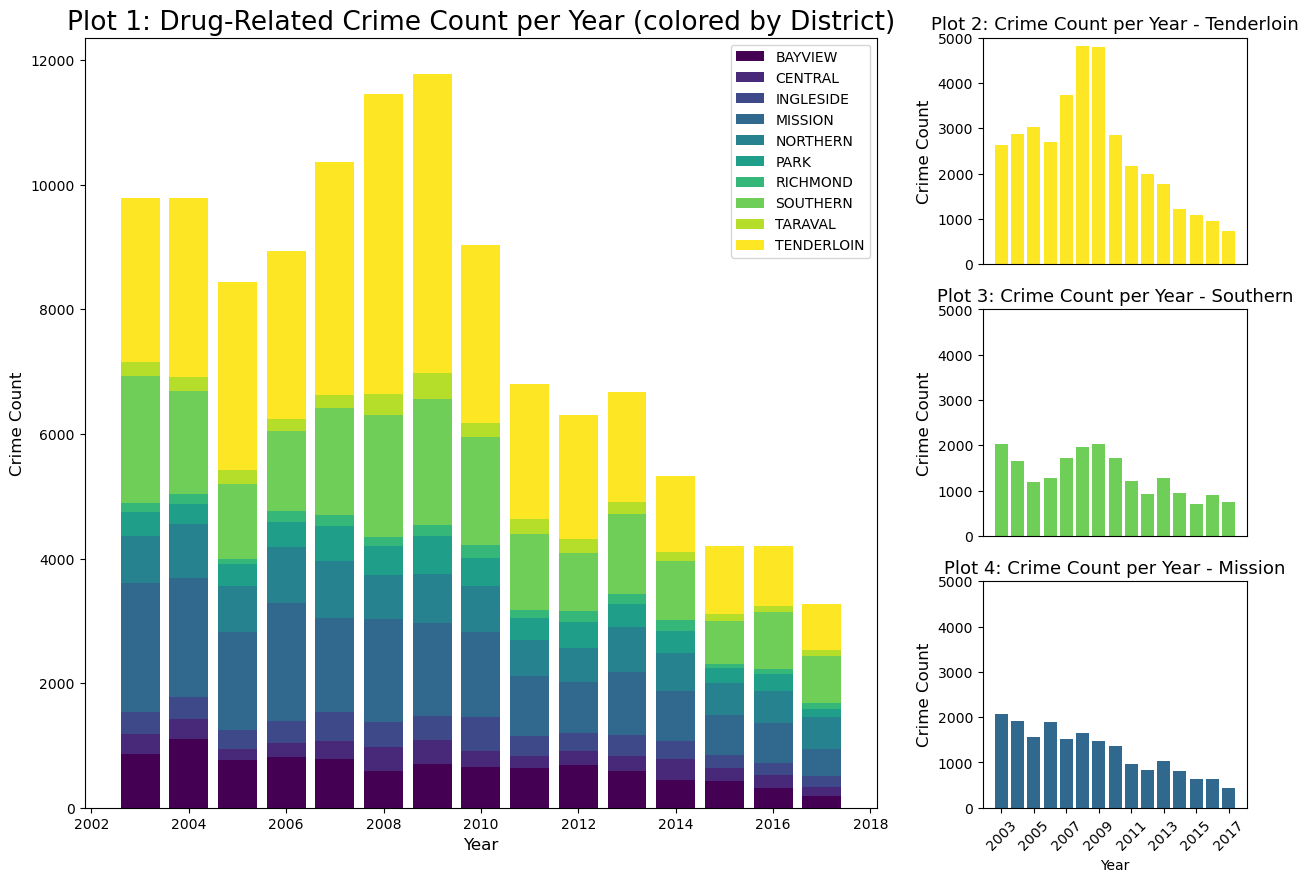

In [8]:
year_district_counts = df_drugs.groupby(["Year", "PdDistrict"]).size().unstack().fillna(0)


fig = plt.figure(figsize=(15, 10))

gs = fig.add_gridspec(3, 2, width_ratios=[3, 1])  # Adjusted to 2 columns
ax0 = fig.add_subplot(gs[:, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[2, 1])

#fill the fist plot
# Plot data into each subplot
#make a stacked barplot of the crime count with different colored districts
# Plot stacked barplot of crime count per year, colored by district using the 'viridis' colormap
bottom = np.zeros(len(year_district_counts.index))
colors = cm.viridis(np.linspace(0, 1, len(year_district_counts.columns)))
for i, district in enumerate(year_district_counts.columns):
    bars = ax0.bar(year_district_counts.index, year_district_counts[district], bottom=bottom, label=district, color=colors[i])
    print("color of district", colors[i], district)
    bottom += year_district_counts[district]

ax0.set_title('Plot 1: Drug-Related Crime Count per Year (colored by District)')
#set the title fond to be bigger
ax0.title.set_fontsize(19)
ax0.set_xlabel('Year')
ax0.set_ylabel('Crime Count')
#lables fond size
ax0.xaxis.label.set_fontsize(12)
ax0.yaxis.label.set_fontsize(12)
ax0.legend()

#Make the second plot
# Plot crime count per year for TENDERLOIN
#use the same color as for the previous plot
ax1.bar(tenderloin_year_counts.index, tenderloin_year_counts.values, color=colors[9])
ax1.set_title('Plot 2: Crime Count per Year - Tenderloin')
ax1.title.set_fontsize(13)
ax1.set_ylabel('Crime Count')
ax1.yaxis.label.set_fontsize(12)

ax1.set_ylim([0, 5000])

ax1.set_xticks([])

#The third plot
# Plot crime count per year for SOUTHERN
#use the same color as for the previous plot
ax2.bar(southern_year_counts.index, southern_year_counts.values, color=colors[7])
ax2.set_title('Plot 3: Crime Count per Year - Southern')
ax2.title.set_fontsize(13)
ax2.yaxis.label.set_fontsize(12)

ax2.set_ylabel('Crime Count')
#Make the range go from 0 to 5000
ax2.set_ylim([0, 5000])
#remove the x-axis legend
ax2.set_xticks([])

#The third plot
# Plot crime count per year for SOUTHERN
#use the same color as for the previous plot
ax3.bar(mission_year_counts.index, mission_year_counts.values, color=colors[3])
ax3.set_title('Plot 4: Crime Count per Year - Mission')
ax3.title.set_fontsize(13)
ax3.yaxis.label.set_fontsize(12)
ax3.set_ylabel('Crime Count')
ax3.set_xlabel('Year')
ax3.set_ylim([0, 5000])
#put a bit more years on the x-axis

custom_xticks = [2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017]

ax3.set_xticks(custom_xticks)


plt.xticks(rotation=45)

plt.savefig("drug_crime_all.png")
plt.show()


In [9]:
#calculate the total number of crimes in each district
# Calculate the total number of crimes in each district
district_counts = df_drugs["PdDistrict"].value_counts()

In [10]:
#count the number of instances in df_crimes for every year
year_count = df_crime["Year"].value_counts()
#reindex year count according to the year
year_count = year_count.reindex(range(2003, 2018))


In [11]:
#look at the number of instances for each year for the district tenderloin
df_crime_tenderloin = df_crime[df_crime["PdDistrict"] == "TENDERLOIN"]
tenderloin_year_count = df_crime_tenderloin["Year"].value_counts()

#reindex the count according to the year
tenderloin_year_count = tenderloin_year_count.reindex(range(2003, 2018))

In [12]:
#now the same for the district southern

df_crime_southern = df_crime[df_crime["PdDistrict"] == "MISSION"]
southern_year_count = df_crime_southern["Year"].value_counts()
southern_year_count = southern_year_count.reindex(range(2003, 2018))


<Axes: >

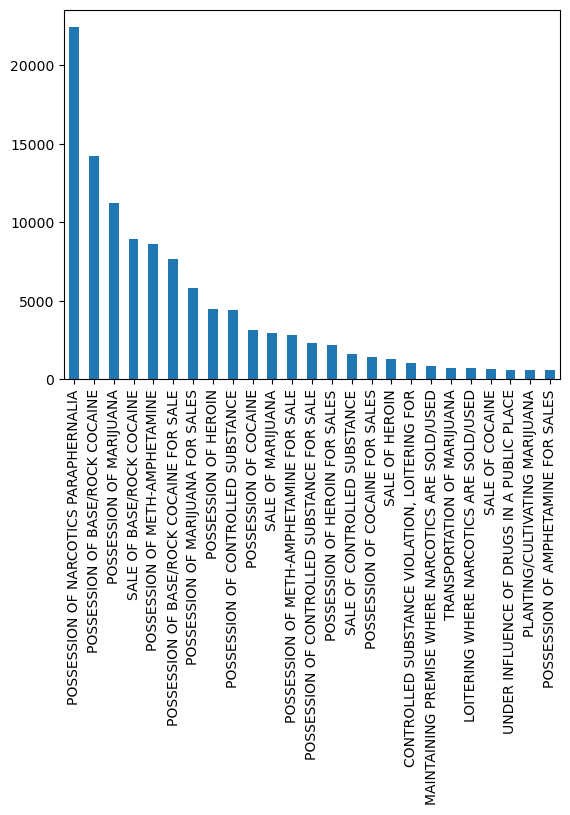

In [13]:
#Investigate the different types of drugs?


#count the number of instances for each discription
df_drugs["Descript"].value_counts()

#Print only the first 25
df_drugs["Descript"].value_counts().head(25).plot(kind='bar')



In [14]:
df_death = pd.read_csv("Unintentional_Drug_Overdose.csv") 


In [15]:
#Indentifying the instances realated to a specific drug (most popular drug)


#make a new colunm in df_drugs
df_drugs["drug_type"] = "Other"

df_drugs.loc[df_drugs["Descript"].str.lower().str.contains("cocain"), "drug_type"] = "Cocaine"
df_drugs.loc[df_drugs["Descript"].str.lower().str.contains("marijuana"), "drug_type"] = "Marijuana"
df_drugs.loc[df_drugs["Descript"].str.lower().str.contains("narcotics paraphernalia"), "drug_type"] = "Narcotics paraphernalia"
df_drugs.loc[df_drugs["Descript"].str.lower().str.contains("heroin"), "drug_type"] = "Heroin"
df_drugs.loc[df_drugs["Descript"].str.lower().str.contains("meth-amphetamine"), "drug_type"] = "Meth-amphetamine"
#df_drugs.loc[df_drugs["Descript"].str.lower().str.contains("fentanyl"), "drug_type"] = "Fentanyl"


df_drugs["activity"] = "Other"
df_drugs.loc[df_drugs["Descript"].str.lower().str.contains("possession"), "activity"] = "Possession"
df_drugs.loc[df_drugs["Descript"].str.lower().str.contains("sale"), "activity"] = "Sale"
df_drugs.loc[df_drugs["Descript"].str.lower().str.contains("transportation"), "activity"] = "Transportation"
df_drugs.loc[df_drugs["Descript"].str.lower().str.contains("loittering"), "activity"] = "Loittering"


#look at the number of instances where the drug is fentanyl
#print(df_drugs[df_drugs["drug_type"] == "Fentanyl"])
#There are no instances with fentanyl, so we do not include this drug type in the analysis

C:\Users\Orianne\AppData\Local\Temp\ipykernel_33804\1207049600.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drugs["drug_type"] = "Other"
C:\Users\Orianne\AppData\Local\Temp\ipykernel_33804\1207049600.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drugs["activity"] = "Other"


In [16]:
#ONLY FOR & MONTHS AT THE TIME WHERE THE HOVER ONLY IS VISIBLE ON GLYPH LINES!!! I LIKE THIS ONE BETTER
df_tenderloin_drugs = df_drugs[df_drugs["PdDistrict"] == "TENDERLOIN"]

# Assuming you have imported necessary libraries and defined your dataframe `df_tenderloin_drugs`

df_tenderloin_drugs['halfonthofYear'] = df_tenderloin_drugs['Date'].dt.year * 2 + df_tenderloin_drugs['Date'].dt.month // 6
df_tenderloin_drugs = df_tenderloin_drugs.set_index("halfonthofYear")
tenderloin_drugs_halfyear = df_tenderloin_drugs.groupby(["halfonthofYear", "drug_type"]).size().unstack().fillna(0)
tenderloin_activity_halfyear = df_tenderloin_drugs.groupby(["halfonthofYear", "activity"]).size().unstack().fillna(0)

# Generate the range from 0 to 15 with a step of 0.5 starting from 0
my_range = [x / 2 for x in range(0, 31)]

#set the values of halfofyear to the values of my_range
tenderloin_drugs_halfyear.index = my_range
tenderloin_activity_halfyear.index = my_range

C:\Users\Orianne\AppData\Local\Temp\ipykernel_33804\504689763.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tenderloin_drugs['halfonthofYear'] = df_tenderloin_drugs['Date'].dt.year * 2 + df_tenderloin_drugs['Date'].dt.month // 6


In [17]:

x_range = (tenderloin_drugs_halfyear.index[0], tenderloin_drugs_halfyear.index[-1])

# Generate unique colors for each drug type
colors = ["#440154", "#3B528B", "#21908C", "#5DC863", "#FDE725", "#FF5733"]
color_mapping = {drug_type: colors[i % len(colors)] for i, drug_type in enumerate(tenderloin_drugs_halfyear.columns)}

# Transform dataframe to ColumnDataSource
source = ColumnDataSource(data={
    'x': tenderloin_drugs_halfyear.index,
    **{drug_type: tenderloin_drugs_halfyear[drug_type] for drug_type in tenderloin_drugs_halfyear.columns},
})


p = figure(width=800, height=650, x_range=x_range)
p.title.text = 'Drugs/narcotics reporting counts in Tenderloin per half year'
#center the title
p.title.align = 'center'
#set the title fond to be bigger
p.title.text_font_size = '15pt'

# Plot lines
renderers = []
for drug_type in tenderloin_drugs_halfyear.columns:
    renderer = p.line('x', drug_type, source=source, line_width=1, color=color_mapping[drug_type], alpha=0.8, legend_label=drug_type)
    renderers.append(renderer)

p.legend.location = "top_left"
p.legend.click_policy = "hide"

hover = HoverTool(
    tooltips=[
        ('Years after 2003', '@x{0.0}'),
        ('Drugs/narcotics reporting counts', f'@{drug_type}{{int}}')
    ],

    # Display a tooltip whenever the cursor is on the glyph
    mode='mouse',

    # Limit hover to only show up when over the line glyphs
    renderers=renderers
)

#axis legend
p.xaxis.axis_label = 'Years after 2003'
p.yaxis.axis_label = 'Drugs/narcotics reporting counts'

p.add_tools(hover)

save(p, filename="drug_reportings_tenderloin.html")

show(p)


C:\Users\Orianne\AppData\Local\Temp\ipykernel_33804\1947857657.py:49: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(p, filename="drug_reportings_tenderloin.html")
C:\Users\Orianne\AppData\Local\Temp\ipykernel_33804\1947857657.py:49: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  save(p, filename="drug_reportings_tenderloin.html")


In [27]:
url = 'https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson'
gdf = gpd.read_file(url)


In [28]:
coord_center_point = (37.7840,-122.4126)
data2 = df_drugs.copy()
data2 = data2[data2['Category'] == 'DRUG/NARCOTIC']
# in tenderloin
data2 = data2[data2['PdDistrict'] == 'TENDERLOIN']
len(data2)
print(len(data2))
df_crime_tenderloin = data2.copy()
# Do heat map for the data
 
# Get the values for column X and Y
X = data2['X']
Y = data2['Y']
# get an array with the coordinates
locations = np.array([Y,X]).T
print(locations)
 
# Create a map
this_map2 = folium.Map(coord_center_point, tiles="Cartodb Positron",  zoom_start=16)
tenderloin_polygon = gdf[gdf['DISTRICT'] == 'TENDERLOIN']['geometry'].iloc[0]
 
minx, miny, maxx, maxy = tenderloin_polygon.bounds
 
subset = df_crime_tenderloin[(df_crime_tenderloin["Y"] >= miny) & (df_crime_tenderloin["Y"] <= maxy) &
                             (df_crime_tenderloin["X"] >= minx) & (df_crime_tenderloin["X"] <= maxx)] # data within the polygon bounds for Tenderloin
 
# dirtiest block in Tenderloin
 
# highlight tenderloin district in the map
folium.GeoJson(tenderloin_polygon).add_to(this_map2)
 
HeatMap(data=subset[['Y', 'X']]).add_to(this_map2)  
Marker([37.783879, -122.415736], popup='300 block of Hyde Street').add_to(this_map2)
#highlight tenderloin district in the map
this_map2.add_child(folium.LatLngPopup())
 
 
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Heatmap of Drug/Narcotic reports in Tenderloin (2003-2017) </b></h3>
             '''
this_map2.get_root().html.add_child(folium.Element(title_html))
 
 
 
this_map2.save("heatmap_tenderloin_map.html")
 
this_map2



37365
[[  37.78465763 -122.41443316]
 [  37.78535304 -122.41288318]
 [  37.78279311 -122.41405629]
 ...
 [  37.78274196 -122.41490054]
 [  37.78165428 -122.41550824]
 [  37.78331075 -122.4175307 ]]
